<a href="https://colab.research.google.com/github/BetterAIworld-Vishnu/IPL-Data-Analysis-using-numpy-and-Matplot-lib/blob/main/Video_detection_using_YOLO_Ultralytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objects detection for given video Using YOLO Ultralytics

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/107.7 GB disk)


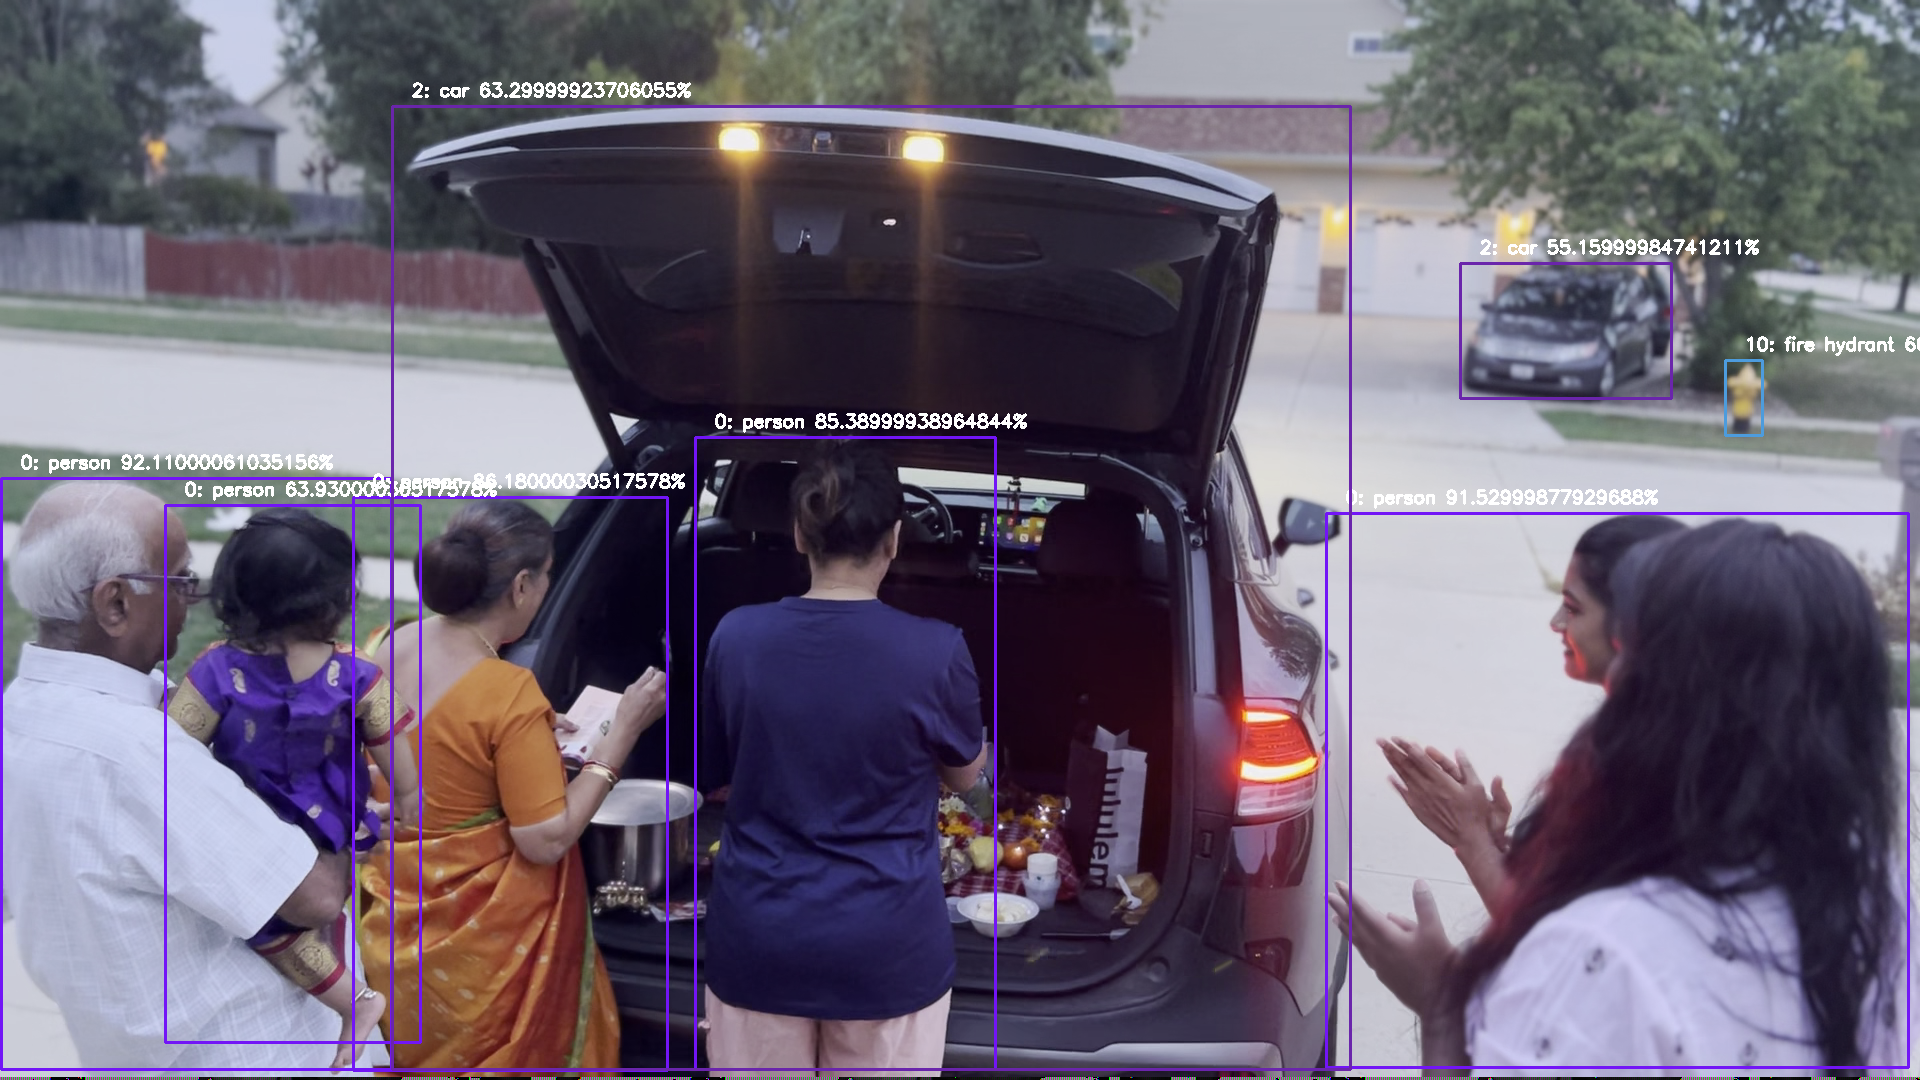

Video ended or failed, exiting...


In [ ]:
# Import necessary libraries
import random  # To generate random colors
from ultralytics import YOLO  # For YOLOv8 object detection
import cv2  # OpenCV for image/video processing
from google.colab.patches import cv2_imshow  # Colab-friendly image display
from IPython.display import display, Image  # Display tools in Jupyter/Colab
from IPython.display import clear_output  # Clears previous output for clean updates

# Load class names (e.g., person, car, dog...) from text file
with open('/content/coco1.txt', 'r') as my_file:
    class_list = my_file.read().split("\n")  # Splits file into a list of class names

# Assign a random BGR color for each class
detection_colors = []
for _ in range(len(class_list)):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    detection_colors.append((b, g, r))  # OpenCV uses BGR format

# Load YOLOv8 model using pretrained weights
model = YOLO("/content/weights/yolov8n.pt")  # Make sure weights file exists at this path

# Load the video file
cap = cv2.VideoCapture('/content/IMG_5184.mov')  # Replace with your actual video path

# Check if video is successfully opened
if not cap.isOpened():
    print("Cannot open video file")
    exit()

# Read and process frames in a loop
while True:
    ret, frame = cap.read()  # Read one frame from the video
    if not ret:
        print("Video ended or failed, exiting...")
        break

    # Run object detection on the current frame
    detect_params = model.predict(source=[frame], conf=0.45, save=False)

    # Extract detected bounding boxes
    boxes = detect_params[0].boxes
    for i in range(len(boxes)):
        box = boxes[i]
        clsID = int(box.cls.cpu().numpy()[0])  # Get class ID
        conf = box.conf.cpu().numpy()[0]  # Confidence score
        bb = box.xyxy.cpu().numpy()[0]  # Bounding box [x1, y1, x2, y2]

        # Draw rectangle around detected object
        cv2.rectangle(
            frame,
            (int(bb[0]), int(bb[1])),  # Top-left corner
            (int(bb[2]), int(bb[3])),  # Bottom-right corner
            detection_colors[clsID],  # Color based on class
            2  # Line thickness
        )

        # Prepare label with class name and confidence
        label = f"{class_list[clsID]} {round(conf * 100, 2)}%"
        cv2.putText(
            frame, label,
            (int(bb[0]), int(bb[1]) - 10),  # Above the bounding box
            cv2.FONT_HERSHEY_SIMPLEX,  # Font type
            0.6,  # Font scale
            (255, 255, 255),  # White color
            2  # Thickness
        )

    # Display the frame in Colab notebook
    clear_output(wait=True)  # Clear previous output
    cv2_imshow(frame)  # Show current frame with detections
    cv2.waitKey(1)  # Short delay for display

# Clean up resources
cap.release()  # Release video file
cv2.destroyAllWindows()  # Close OpenCV windows (does nothing in Colab)
